In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Read in data

In [3]:
src_path = 'D:\Documents\Python\price-check\output\pet-circle.csv'.replace('\\', '/')
src_data = pd.read_csv(src_path)

src_data.info()
src_data.product_name.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 675 non-null    object 
 1   scrape_date         675 non-null    object 
 2   scrape_weekday      675 non-null    object 
 3   scrape_time         675 non-null    object 
 4   product_name        675 non-null    object 
 5   product_size        675 non-null    object 
 6   sku_id              675 non-null    object 
 7   autodelivery_price  675 non-null    float64
 8   standard_price      675 non-null    object 
 9   sold_out            675 non-null    bool   
dtypes: bool(1), float64(1), object(8)
memory usage: 48.2+ KB


array(['royal canin kitten instinctive jelly wet cat food pouches',
       'royal canin kitten instinctive gravy wet cat food pouches',
       'rufus and coco wee kitty clumping corn litter'], dtype=object)

In [4]:
kitty_litter = src_data[src_data['product_name']=='rufus and coco wee kitty clumping corn litter']

kitty_litter.head()

,url,scrape_date,scrape_weekday,scrape_time,product_name,product_size,sku_id,autodelivery_price,standard_price,sold_out
4,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,2kg,RCCLCLXX,10.400000,$10.94,False
5,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,4kg,RCCLCL8,20.340000,$21.40,False
6,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,9kg,RCCLCL18US,42.750002,$44.99,False
7,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,16kg,RCCLCL8MS,71.160002,$74.90,False
8,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,18kg,RCCLCL18USVO2X,85.490003,$89.98,False


# Explore data

In [12]:
kitty_litter.groupby(['product_size', 'sku_id']).size().reset_index().rename(columns={0: 'count'})

,product_size,sku_id,count
0,16kg,RCCLCL8MS,75
1,18kg,RCCLCL18USVO2X,75
2,2kg,RCCLCLXX,75
3,4kg,RCCLCL8,75
4,9kg,RCCLCL18US,75


Make new column that does price per kgkitty_litter['dollar_per_kg'] = (kitty_litter.autodelivery_price / kitty_litter.weight)

In [16]:
kitty_litter[['weight', 'unit']] = kitty_litter['product_size'].str.split('([a-z]+)', expand=True).iloc[:, 0:2]
kitty_litter['weight'] = kitty_litter['weight'].astype(float)
kitty_litter['dollar_per_kg'] = (kitty_litter.autodelivery_price / kitty_litter.weight)

kitty_litter.head()

C:\ProgramData\Anaconda3\envs\analytics_1\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Koo\AppData\Local\Temp/ipykernel_8720/3856693574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitty_litter['weight'] = kitty_litter['weight'].astype(float)
C:\Users\Koo\AppData\Local\Temp/ipykernel_8720/3856693574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,url,scrape_date,scrape_weekday,scrape_time,product_name,product_size,sku_id,autodelivery_price,standard_price,sold_out,weight,unit,dollar_per_kg
4,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,2kg,RCCLCLXX,10.400000,$10.94,False,2.0,kg,5.200000
5,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,4kg,RCCLCL8,20.340000,$21.40,False,4.0,kg,5.085000
6,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,9kg,RCCLCL18US,42.750002,$44.99,False,9.0,kg,4.750000
7,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,16kg,RCCLCL8MS,71.160002,$74.90,False,16.0,kg,4.447500
8,https://www.petcircle.com.au/product/rufus-and...,2020-10-23,Friday,17:06:39.652196,rufus and coco wee kitty clumping corn litter,18kg,RCCLCL18USVO2X,85.490003,$89.98,False,18.0,kg,4.749445


See range of price per kg, and average price per kg

Group by product size

In [24]:
kitty_litter.groupby(['product_size'])['dollar_per_kg'].describe().sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max
product_size,,,,,,,,
18kg,75.0,4.254200,0.344365,3.620000,3.909444,4.485556,4.485556,4.749445
9kg,75.0,4.368933,0.434182,3.324444,3.990000,4.750000,4.750000,4.750000
16kg,75.0,4.389283,0.142754,3.780000,4.280625,4.447500,4.447500,4.701875
4kg,75.0,5.068600,0.448424,3.857500,4.797500,5.085000,5.462500,5.462500
2kg,75.0,5.843200,0.523616,4.630000,5.510000,6.175000,6.175000,6.175000


## Plotting this

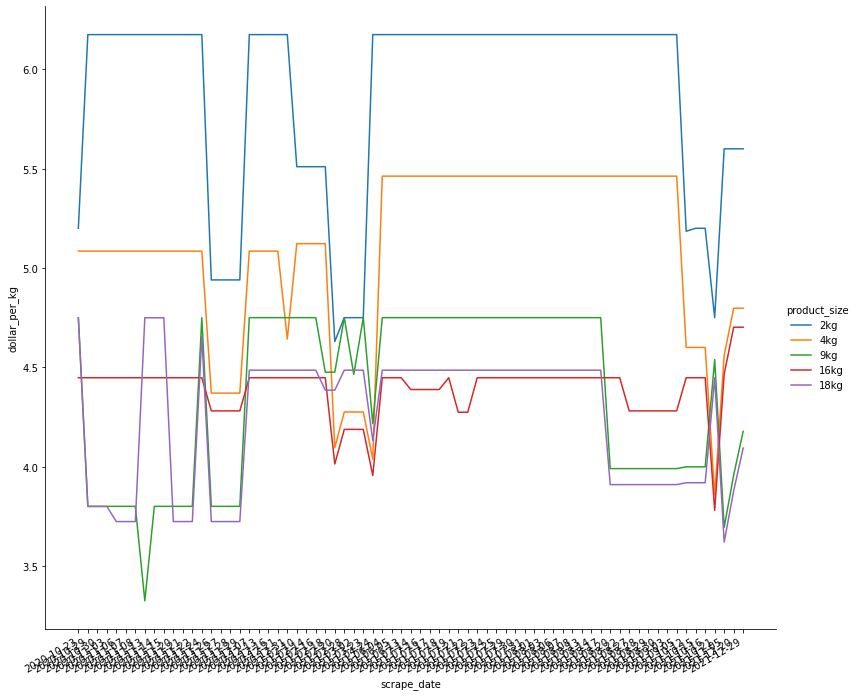

In [32]:
p = sns.relplot(x="scrape_date", y="dollar_per_kg", hue="product_size",
                kind="line", data=kitty_litter,
                height=11)
p.figure.autofmt_xdate()

### See distribution of data by month

Due to uneven collection periods, need to see what the spread over time is.

In [44]:
kitty_litter['scrape_date'] = pd.to_datetime(kitty_litter['scrape_date'])

C:\Users\Koo\AppData\Local\Temp/ipykernel_8720/149982831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kitty_litter['scrape_date'] = pd.to_datetime(kitty_litter['scrape_date'])


In [45]:
kitty_litter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 4 to 674
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   url                 375 non-null    object        
 1   scrape_date         375 non-null    datetime64[ns]
 2   scrape_weekday      375 non-null    object        
 3   scrape_time         375 non-null    object        
 4   product_name        375 non-null    object        
 5   product_size        375 non-null    object        
 6   sku_id              375 non-null    object        
 7   autodelivery_price  375 non-null    float64       
 8   standard_price      375 non-null    object        
 9   sold_out            375 non-null    bool          
 10  weight              375 non-null    float64       
 11  unit                375 non-null    object        
 12  dollar_per_kg       375 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), object(

#### See group by year

In [53]:
kitty_litter.groupby(by=[kitty_litter.scrape_date.dt.year]).size().reset_index().rename(columns={0: 'count'})

,scrape_date,count
0,2020,120
1,2021,255


Twice as many data points in 2021 compared to 2020.

#### See group by month

In [55]:
by_month = kitty_litter.groupby(by=[kitty_litter.scrape_date.dt.month]).size().reset_index().rename(columns={0: 'count'})
by_month

,scrape_date,count
0,2,35
1,3,15
2,4,5
3,6,15
4,7,65
5,8,70
6,9,10
7,10,40
8,11,80
9,12,40


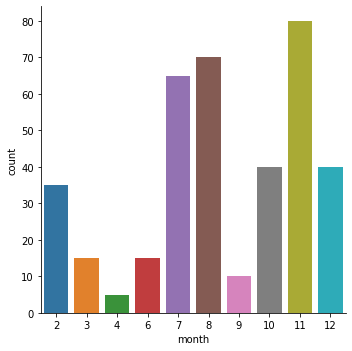

In [68]:
sns.catplot(x="scrape_date", y="count", kind="bar", data=by_month).set(xlabel="month")

- No data in January.
- Low counts in April and September.
- Waaay too much in November.

Since the distribution is so uneven will make it hard to do any kind of analysis.